## Aula 14: Regressão Logística

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score

plt.style.use('ggplot')

diretorio = '../datasets/'

arquivos = os.listdir(diretorio)


df = pd.read_csv(diretorio + arquivos[next(iter([i for i, elem in enumerate(arquivos) if 'titanic' in elem]), 0)])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Introdução Intuitiva

Uma Regressão Linear Múltipla buscar entender os relacionamentos entre diversas variáveis explicativas (x) com a variável resposta (y), que, de forma matemática, busca achar os coeficiente (b) da equação:

$$y = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + ... + \beta_{n} x_{n}$$

Ao aplicar uma Regressão Linear Múltipla em um conjunto de dados no qual a variáve resposta é binária, temos:

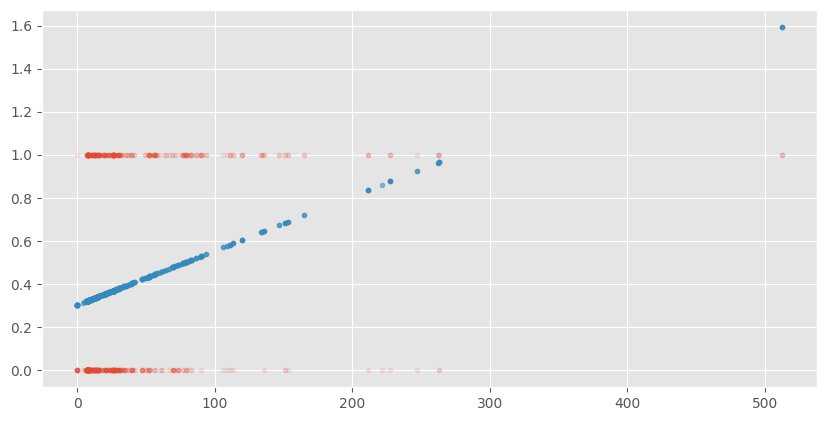

In [2]:
x = df.Fare.values.reshape(-1, 1)
y = df.Survived

lr = LinearRegression()

lr.fit(x, y)

y_pred = lr.predict(x)

plt.figure(figsize = (10, 5), dpi = 100)

plt.plot(x, y, '.', alpha = 0.1)
plt.plot(x, y_pred, '.', alpha = 0.5)
plt.show()

Porém, para transformar a resposta do modelo em probabilidade entre 0 e 1 usamos a função logística, dada por 

$$f(x) = \frac{L}{1+e^{-k(x-x_0)}}$$
$f(x) = $ resultado da função\
$L =$ Valor máximo da curva\
$k =$ logistic growth rate or steepness of the curve (declividade da curva)\
$x_0 = $ valor de x no ponto médio da curva sigmoide\
$x = $ Numero real

$$f(x) = \frac{e^{x}}{1 + e^{-x}}$$

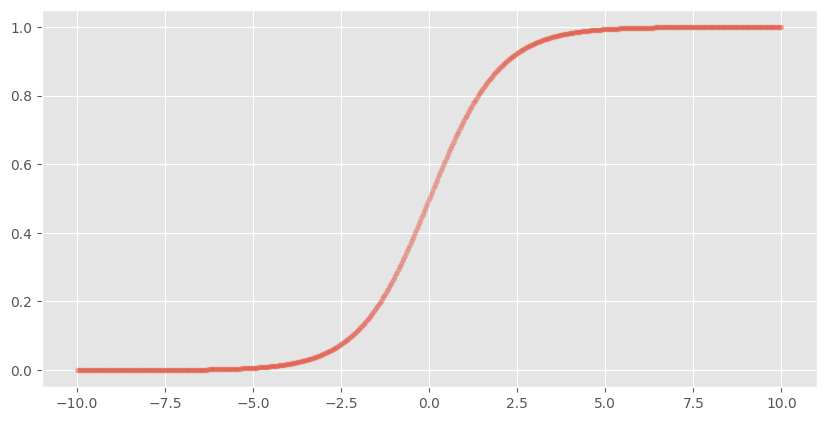

In [6]:
x = np.linspace(-10, 10, 1000)
y = np.exp(x)/(1+np.exp(x))

plt.figure(figsize = (10, 5), dpi = 100)

plt.plot(x, y, '.', alpha = 0.15)
plt.show()

$$y = p = \frac{1}{1 + e^{-(\beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + ... + \beta_{n} x_{n})}}$$


Como queremos que nossa variável reposta seja uma probabilidade $p$ entre 0 e 1 (redundância proposital), podemos aplicar a função logística na função de Regressão Linear, obtendo:

$$y = p = \frac{1}{1 + e^{-(\beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + ... + \beta_{n} x_{n})}}$$

$$p = \frac{1}{1 + \frac{1}{e^{(\beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + ... + \beta_{n} x_{n})}}}$$

$$p = \frac{1}{\frac{e^{(\beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + ... + \beta_{n} x_{n})}}{e^{(\beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + ... + \beta_{n} x_{n})}} + \frac{1}{e^{(\beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + ... + \beta_{n} x_{n})}}}$$

$$p = \frac{e^{(\beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + ... + \beta_{n} x_{n})}}{e^{(\beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + ... + \beta_{n} x_{n})} + 1}$$


$$log(x) = z$$

$$x = e^{z}$$
Porém, seria interessante que mantivéssemos a equação em um formato linear, como é na Regressão Linear, afinal, única coisa que queremos modificar é a resposta. Para tirar a função exponencial do denominador da função, usaremos chances ($Odds$) ao invés de probabilidades. Chamaremos de $Odds$ a proporção entre sobrevivência (1) e não sobrevivência (0), ou, em outras palavras, a probabilidade de um evento ocorrer sobre a probabilidade dele não ocorrer. Representamos da seguinte forma:

$$Odds(Y = 1) = \frac{p}{1 - p} $$

Aplicando a $Odds$ na equação, temos:

$$\log(Odds) = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + ... + \beta_{n} x_{n}$$

Agora, aplicando uma Regressão Logística aos dados do Titanic, temos:

In [10]:
lr.predict_proba(x)

array([[0.69659638, 0.30340362],
       [0.46457191, 0.53542809],
       [0.69442404, 0.30557596],
       ...,
       [0.64220704, 0.35779296],
       [0.61902646, 0.38097354],
       [0.69498808, 0.30501192]])

In [11]:
y_pred_rot

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,

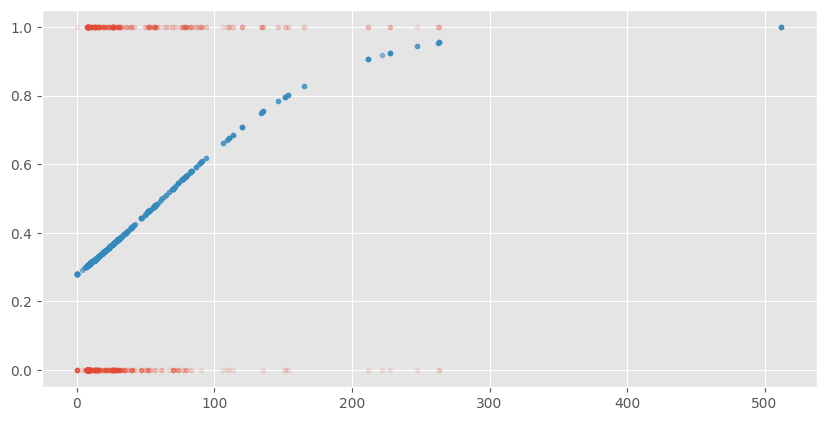

0.6921223063730972
0.6655443322109988


In [12]:
x = df.Fare.values.reshape(-1, 1)
y = df.Survived

lr = LogisticRegression()

lr.fit(x, y)

y_pred = lr.predict_proba(x)[:, 1]
y_pred_rot = lr.predict(x)
plt.figure(figsize = (10, 5), dpi = 100)

plt.plot(x, y, '.', alpha = 0.1)
plt.plot(x, y_pred, '.', alpha = 0.5)
plt.show()
print(roc_auc_score(y, y_pred))
print(accuracy_score(y, y_pred_rot))

Achando as probabilidades:

In [13]:
lr.predict_proba(x)

array([[0.69659638, 0.30340362],
       [0.46457191, 0.53542809],
       [0.69442404, 0.30557596],
       ...,
       [0.64220704, 0.35779296],
       [0.61902646, 0.38097354],
       [0.69498808, 0.30501192]])

In [17]:
y = []
for i in lr.predict_proba(x):
    if i[0] < 0.3:
        y.append(0)
    else:
        y.append(1)

In [19]:
lr.predict(x)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,

Olhando para os coeficientes quando mais variáveis são colocadas no mesmo modelo:

In [20]:
x = df.loc[:, ['Fare', 'SibSp', 'Parch', 'Sex']]
y = df.Survived

def cat_fare(f):
    if f < 1:
        return 0
    elif f < 15:
        return 1
    elif f < 30:
        return 2
    elif f < 100:
        return 3
    else: 
        return 4

x.Sex = x.Sex.apply(lambda x: 0 if x == 'male' else 1)
x.Fare = x.Fare.apply(cat_fare)

lr = LogisticRegression()

lr.fit(x, y)

y_pred = lr.predict_proba(x)[:, 1]
y_pred_rot = lr.predict(x)

print(roc_auc_score(y, y_pred))
print(accuracy_score(y, y_pred_rot))
print(np.exp(lr.coef_))

0.8415806516899413
0.7957351290684624
[[ 2.34229503  0.61242383  0.73855213 13.74751597]]


In [23]:
pd.qcut(df.Fare, q=5, labels=[1, 2, 3, 4, 5]).value_counts()

2    184
4    180
1    179
5    176
3    172
Name: Fare, dtype: int64

In [29]:
pd.cut(df.Fare, bins=[-0.0001, 0, 1, 10]).value_counts()

(1.0, 10.0]       321
(-0.0001, 0.0]     15
(0.0, 1.0]          0
Name: Fare, dtype: int64

## Métricas para Avaliação de Modelos de Classificação

### Acurácia

$$ac({M}) = \frac{1}{n}\sum_{i = 1}^{n}{I(y_{i} = M(x_i)) }$$

A taxa de acerto é um número limitado entre 0 e 1. Quanto maior for o seu valor, melhor é o modelo $M$.

### Matriz de Confusão

<img src="../images/mc.png" alt="Drawing" style="width: 250px;"/>

* **Verdadeiro Positivo (VP)**: Ocorre quando o modelo prevê corretamente a classe Positiva\

* **Falso Positivo (FP) (Erro Tipo I)**: Ocorre quando o modelo prevê a classe **Positiva** porém o valor real é a classe **Negativa**\

* **Falso Negativo (FN) (Erro Tipo II)**: Ocorre quando o modelo prevê a classe **Negativa** porém o valor real é a classe **Positiva**\

* **Verdadeiros Negativos (VN)**: Ocorre quando o modelo prevê corretamente a classe Negativa

### Medidas de Desempenho Derivadas da Matriz de Confusão

Dado a matriz de confusão mostranda no item anterior, podemos extrair, entre outras, as seguintes medidas de desempenho.

#### Acurácia

É a proporção de exemplos positivos classificados corretamente, mais a proporção de exemplos negativos classificados corretamente entre todas as classes preditas pelo modelo $M$.

$$acur(M) = \frac{\textrm{VP+VF}}{\textrm{VP + VN + FP + FN}}$$

#### Precisão

É a proporção de exemplos positivos classificados corretamente entre todos aqueles preditos como positivos pelo modelo $M$.

$$prec(M) = \frac{\textrm{VP}}{\textrm{VP + FP}}$$

#### Recall/Sensibilidade

Taxa de acerto na classe positiva, também conhecida como revocação ou taxa de verdadeiros positivos (TVP).

$$sens(M) = \frac{\textrm{VP}}{\textrm{VP + FN}}$$

$$\textrm{TVP}(M) = sens(M)$$

#### Especificidade

Taxa de acerto na classe negativa, sendo o complementar a taxa de falsos positivos (TFP).

$$esp(M) = \frac{\textrm{VN}}{\textrm{VN + FP}}$$

$$\textrm{TFP}(M) = 1 - esp(M)$$

#### F-Score

É uma média harmônica ponderada da precisão e sensibilidade, dada por:

$$F_w(M) = \frac{(w + 1) \times sens(M) \times prec(M)}{sens(M) + w \times prec(M)} $$

Usando $w = 1$, temos o F1-Score dado por:

$$F_1(M) = \frac{2 \times sens(M) \times prec(M)}{sens(M) + prec(M)} $$



### Análise ROC e Coeficiente de Gini

Pontos no Gráfico ROC com limiar pré-definido:

<img src="../images/roc_1.png" alt="Drawing" style="width: 300px;"/>

Gerando a curva ROC de um modelo:

<img src="../images/roc_2.png" alt="Drawing" style="width: 300px;"/>